# Descente de gradient: choix de pas, démonstration interactive

***
> __Auteur__: Alexandre Gramfort, Joseph Salmon <joseph.salmon@umontpellier.fr>

On cherche à minimiser la fonctiont suivante:

$f(x_1, x_2) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2$

**Question** : est-ce une fonction convexe?

In [1]:
import numpy as np


def f(x):
    x1, x2 = x
    return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
cmap_reversed = matplotlib.cm.get_cmap('RdBu_r')
from mpl_toolkits import mplot3d

In [3]:
X1, X2 = np.meshgrid(np.linspace(-5.5, 5.5, 50),
                     np.linspace(-5.5, 5.5, 50))
Z = f([X1, X2])  # Altitude

<IPython.core.display.Javascript object>


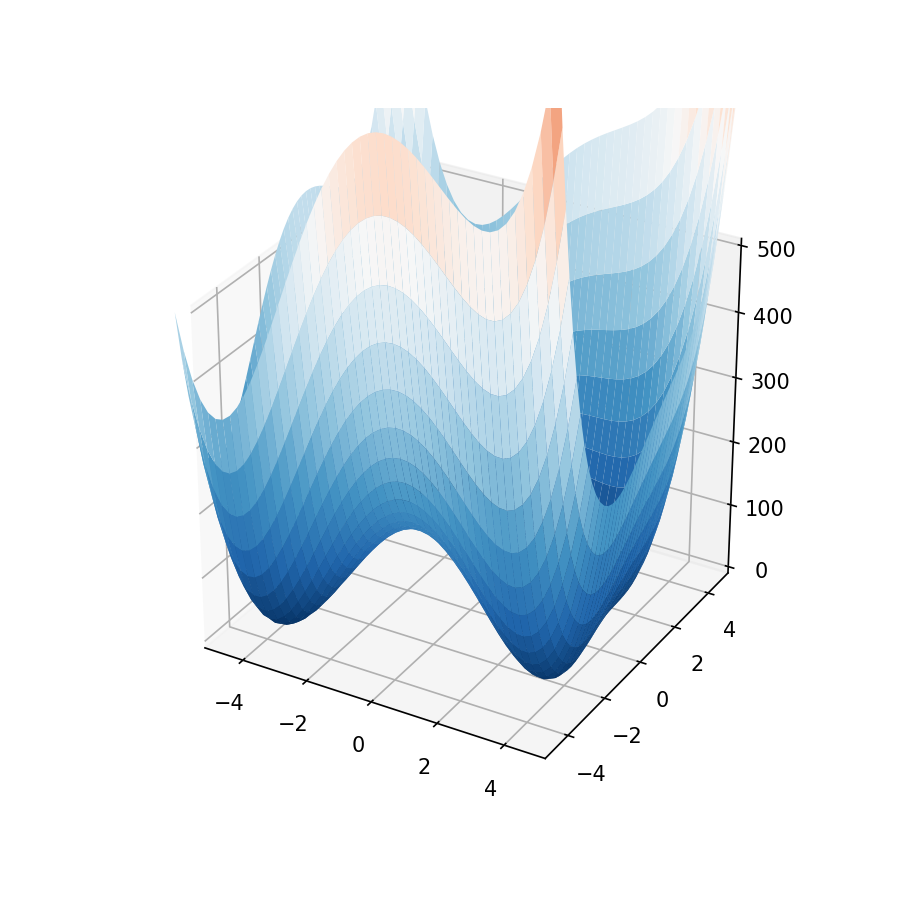

In [4]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Z, rstride=1, cstride=1,
                cmap=cmap_reversed, edgecolor='none')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(0, 500)
plt.show()

In [5]:
def plot(xs=None, cmap=cmap_reversed):
    levels = list(1.7 ** np.linspace(0, 10, 30) - 1.) + [300]
    plt.figure(figsize=(5, 5))
    plt.contourf(X1, X2, np.sqrt(Z), levels=np.sqrt(
        levels), cmap=cmap)
    plt.colorbar(extend='both')
    if xs is not None:
        x1, x2 = np.array(xs).T
        plt.plot(x1, x2, 'k')
        plt.plot(x1, x2, 'o', color='purple')
    plt.show()

<IPython.core.display.Javascript object>


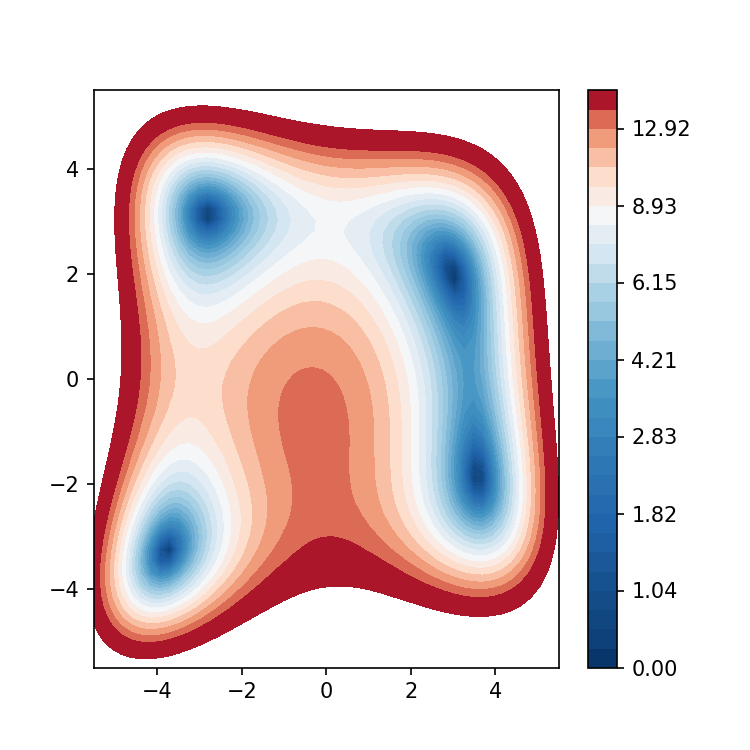

In [6]:
plot()

<IPython.core.display.Javascript object>


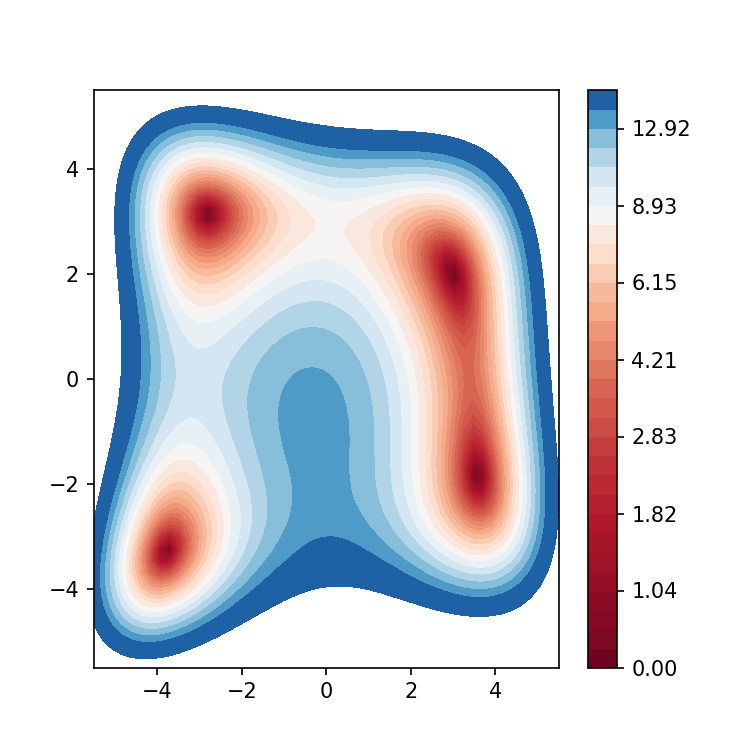

In [7]:
plot(cmap=matplotlib.cm.get_cmap('RdBu'))

<IPython.core.display.Javascript object>


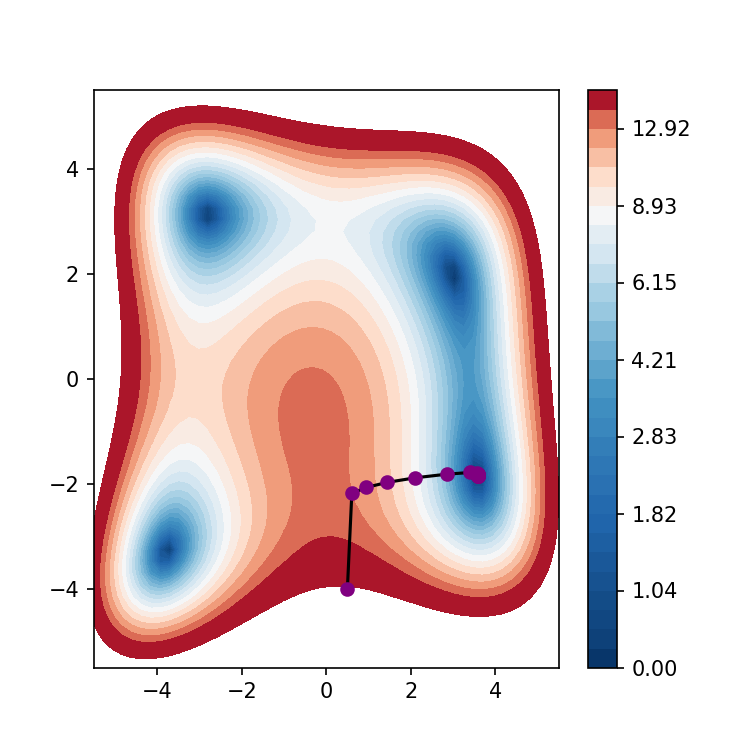

In [8]:
def f_grad(x):
    x1, x2 = x
    df_x1 = 2 * (-7 + x1 + x2**2 + 2 * x1 * (-11 + x1**2 + x2))
    df_x2 = 2 * (-11 + x1**2 + x2 + 2 * x2 * (-7 + x1 + x2**2))
    return np.array([df_x1, df_x2])


x0 = [0.5, -4]


def grad_descent(x_init=x0, step_size=0.01, max_iter=20):
    """Descente de gradient avec un pas constant"""
    x = x_init
    xs = [x]
    for k in range(max_iter):
        x = x - f_grad(x) * step_size
        xs.append(x)
    plot(xs)
    plt.show()


grad_descent(x_init=x0, step_size=0.01, max_iter=20)

In [9]:
from ipywidgets import interact, fixed
interact(grad_descent, x_init=fixed(x0), step_size=(0., .05, 0.005), max_iter=(0, 50, 1))

interactive(children=(FloatSlider(value=0.01, description='step_size', max=0.05, step=0.005), IntSlider(value=…

<function __main__.grad_descent(x_init=[0.5, -4], step_size=0.01, max_iter=20)>

pas choisi:         0.038 
norme du gradient:  181.803 
distance parcourue: 6.965229482153521


pas choisi:         0.109 
norme du gradient:  26.627 
distance parcourue: 2.8949863420736843


pas choisi:         0.056 
norme du gradient:  11.421 
distance parcourue: 0.6412274342113402


pas choisi:         0.012 
norme du gradient:  21.912 
distance parcourue: 0.2705093376117601


pas choisi:         0.026 
norme du gradient:  5.709 
distance parcourue: 0.15011172776084158




<IPython.core.display.Javascript object>


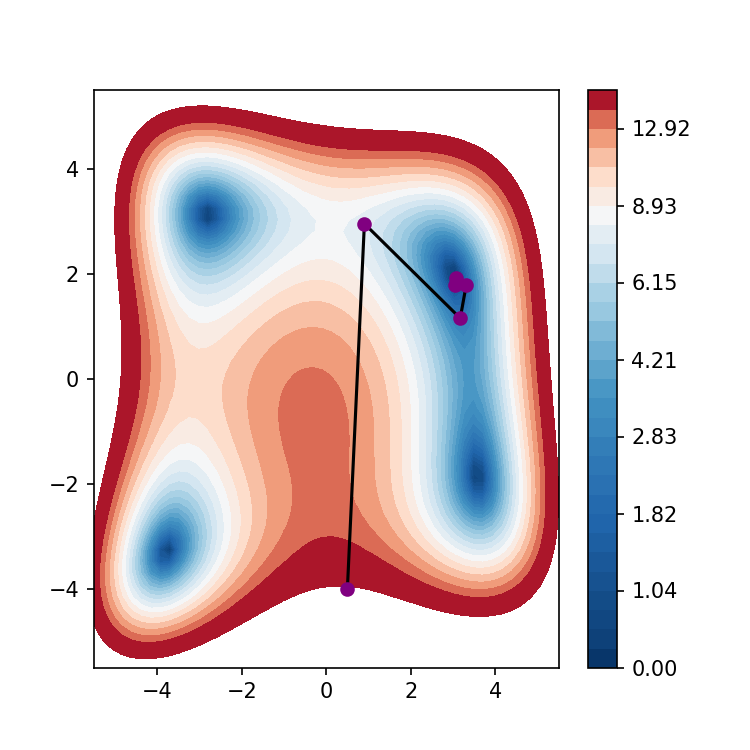

In [10]:
from scipy import optimize

def grad_descent_line_search(step_size=0.01, max_iter=2, line_search=False):
    """Descente de gradient avec une recherche de pas"""
    x = x0
    xs = [x]
    for k in range(max_iter):
        d_k = -f_grad(x)
        if line_search:
            c1, c2 = 0.1, 0.7
            t_k = optimize.line_search(f, f_grad, x, d_k, -d_k, c1=c1, c2=c2)[0]
        else:
            t_k = step_size
        print("pas choisi:         {:.3f} \nnorme du gradient:  {:.3f} \ndistance parcourue: {}\n\n".format(t_k, np.linalg.norm(d_k), t_k *np.linalg.norm(d_k)))
        x = x + t_k * d_k
        xs.append(x)
    plot(xs)

    
grad_descent_line_search(step_size=0.01, max_iter=5, line_search=True)
# interact(grad_descent_line_search, step_size=(0., .05, 0.005), max_iter=(0, 50, 1));